In [1]:
import pandas as pd
from collections import OrderedDict
data = OrderedDict( [('입력', [1, 5, 1, 3, 2, 4, -1, 4, 0, 2, 1, 0, 1, 0, 2]), 
                     (''    , [2, 4, 2, 1, 4, 1, 3, 3, 2, 2, -2, 1, 1, 1, 3]), 
                     (' '   , [0, 3, -1, 0, 2, 2, 2, 3, 6, 1, -2, 3, 3, 4, 3]), 
                     ('출력', [-4, 4, -6, 3, -4, 9, -7, 5, 6, 0, 4, 3, 5, 5, 1])])
df = pd.DataFrame(data)
df

,입력,,,출력
0,1,2,0,-4
1,5,4,3,4
2,1,2,-1,-6
3,3,1,0,3
4,2,4,2,-4
5,4,1,2,9
6,-1,3,2,-7
7,4,3,3,5
8,0,2,6,6
9,2,2,1,0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [11]:
x_data = df.iloc[:, :-1].to_numpy()
t_data = df.iloc[:, [-1]].to_numpy()
print(x_data.shape, t_data.shape)

(15, 3) (15, 1)


In [12]:
model = Sequential()
model.add(Dense(1, input_shape=(3,), activation='linear'))

In [14]:
model.compile(loss='mse', optimizer=SGD(learning_rate=1e-2))
hist = model.fit(x_data, t_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 92.1843
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 53.9858
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 34.7332
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 24.8497
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 19.6080
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 16.6744
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 14.8963
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 13.7041
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 12.8158
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 12.0919
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 11.4625
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 10.8926
Epoch 13/1000
1/1 [===================

In [18]:
test_data = [[5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2]]
rel_val = [2*i[0] + (-3)*i[1] + 2*i[2] for i in test_data]
pred = model.predict(np.array(test_data))

print(pred, '\n==================\n', rel_val)

1/1 [==============================] - 0s 23ms/step
[[-5.0009427]
 [-2.9997299]
 [-3.9976554]
 [ 8.997284 ]
 [ 7.0014315]] 
 [-5, -3, -4, 9, 7]


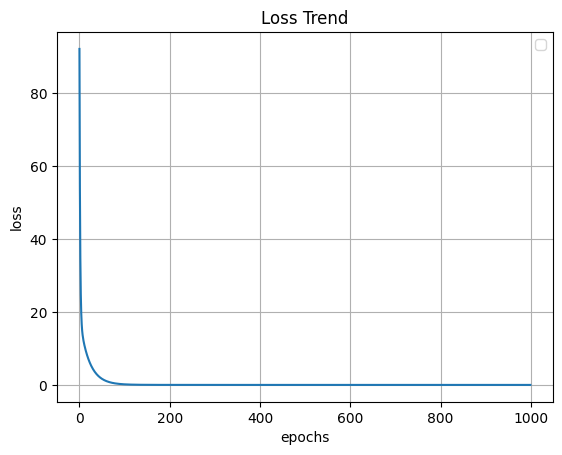

In [19]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train'], loc='best')
plt.plot(hist.history['loss'], label='train loss')
plt.grid()
plt.show()